In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df=pd.read_csv('/content/german_credit_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Risk'].value_counts()

,count
Risk,
good,700
bad,300


In [ ]:
# Replace NaN values with "unknown" in both columns
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')



In [ ]:

# Verify changes
print(df[['Saving accounts', 'Checking account']].isnull().sum())
print(df[['Saving accounts', 'Checking account']].head(10))

Saving accounts     0
Checking account    0
dtype: int64
  Saving accounts Checking account
0         unknown           little
1          little         moderate
2          little          unknown
3          little           little
4          little           little
5         unknown          unknown
6      quite rich          unknown
7          little         moderate
8            rich          unknown
9          little         moderate


In [ ]:


print(pd.crosstab(df['Saving accounts'], df['Risk'], normalize='index'))


Risk                  bad      good
Saving accounts                    
little           0.359867  0.640133
moderate         0.330097  0.669903
quite rich       0.174603  0.825397
rich             0.125000  0.875000
unknown          0.174863  0.825137


**Insight:**

As savings increase, risk of “bad” decreases (rich → lowest bad rate).

Unknown behaves like “quite rich” → low risk (17% bad).

So here, missing savings info seems to align with safer borrowers (maybe only wealthier people didn't disclose).

In [ ]:
print(pd.crosstab(df['Checking account'], df['Risk'], normalize='index'))

Risk                   bad      good
Checking account                    
little            0.492701  0.507299
moderate          0.390335  0.609665
rich              0.222222  0.777778
unknown           0.116751  0.883249


**Insight:**

As checking balance increases, bad risk decreases.

Unknown is the safest group (only 12% bad vs 49% in “little”).

This is strongly correlated with good credit.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
checking_counts = df['Checking account'].value_counts()
checking_counts

,count
Checking account,
unknown,394
little,274
moderate,269
rich,63


In [ ]:
saving_counts = df['Saving accounts'].value_counts()
saving_counts

,count
Saving accounts,
little,603
unknown,183
moderate,103
quite rich,63
rich,48


In [ ]:
purpose_counts = df['Purpose'].value_counts()
purpose_counts

,count
Purpose,
car,337
radio/TV,280
furniture/equipment,181
business,97
education,59
repairs,22
domestic appliances,12
vacation/others,12


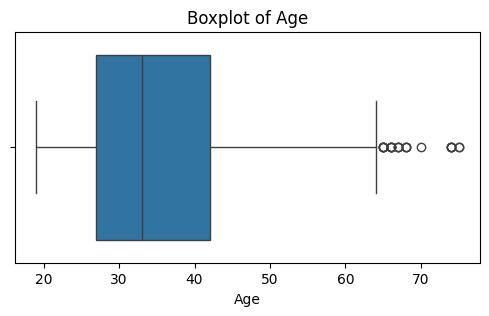

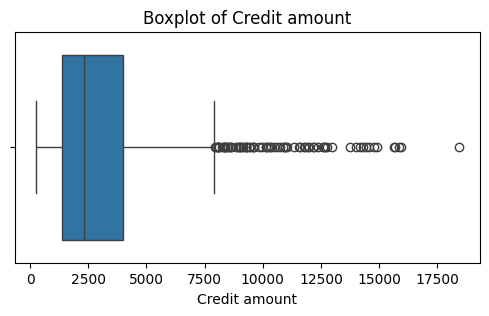

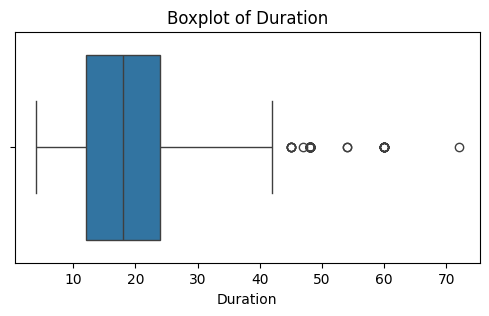

In [ ]:
numeric_cols = ['Age', 'Credit amount', 'Duration']

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

/tmp/ipython-input-2929110579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


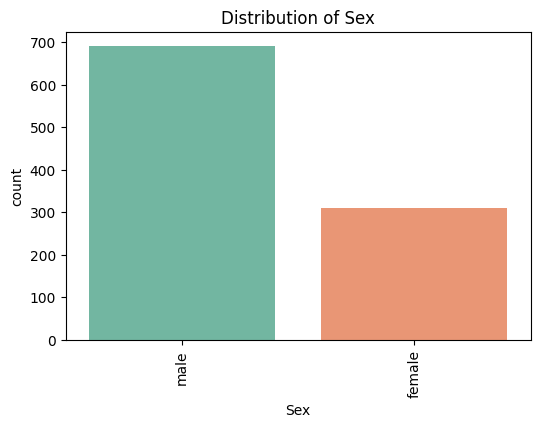

/tmp/ipython-input-2929110579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


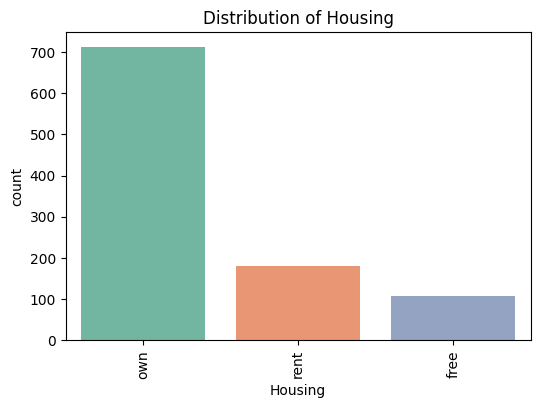

/tmp/ipython-input-2929110579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


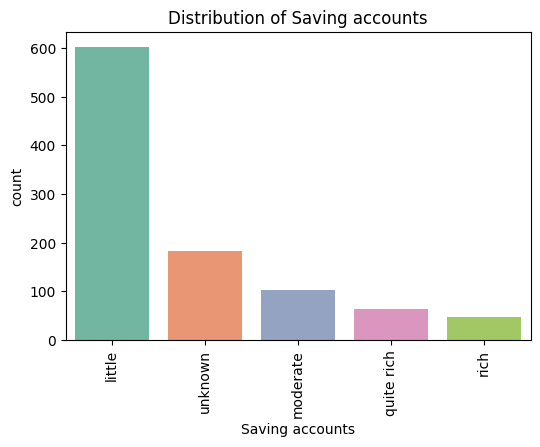

/tmp/ipython-input-2929110579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


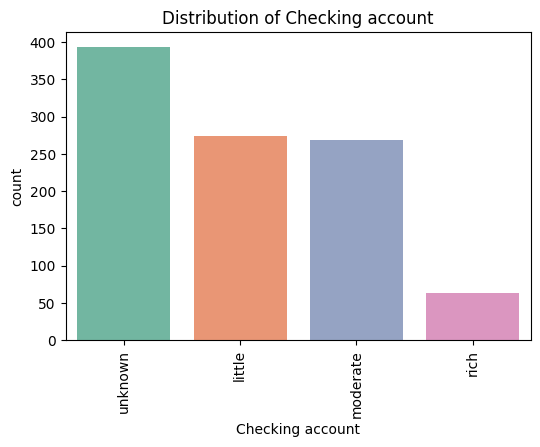

/tmp/ipython-input-2929110579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


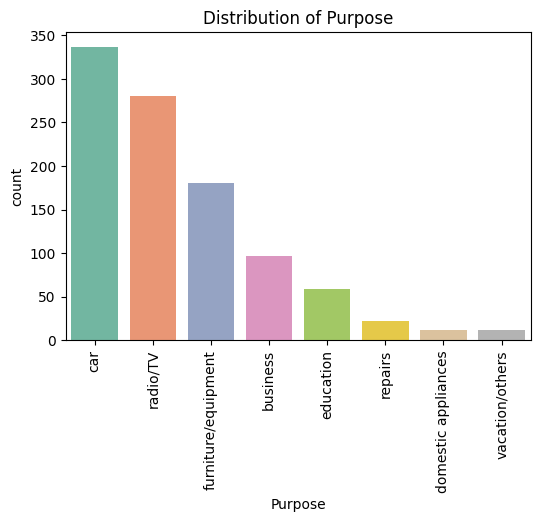

In [ ]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Plot count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

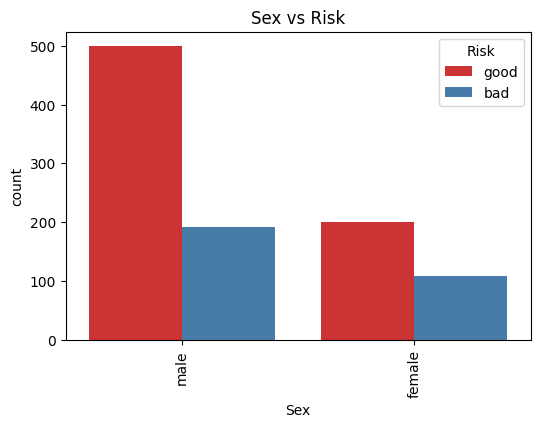

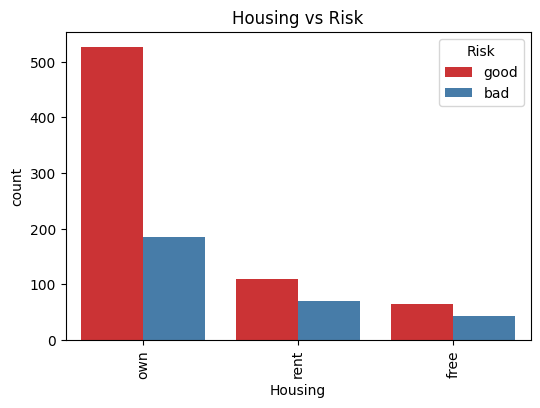

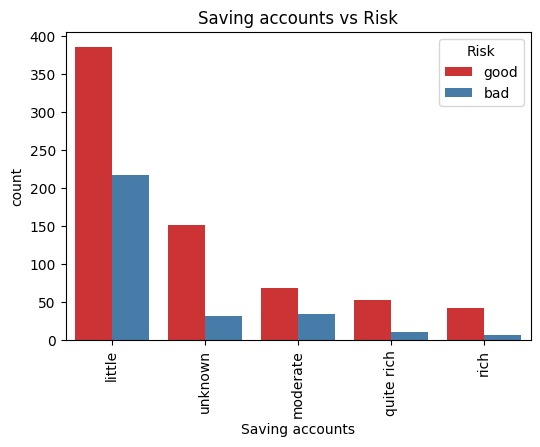

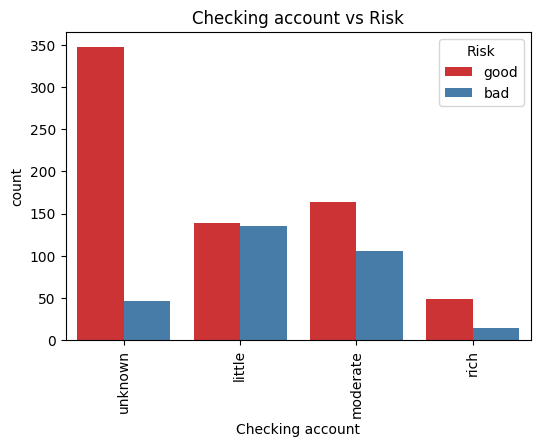

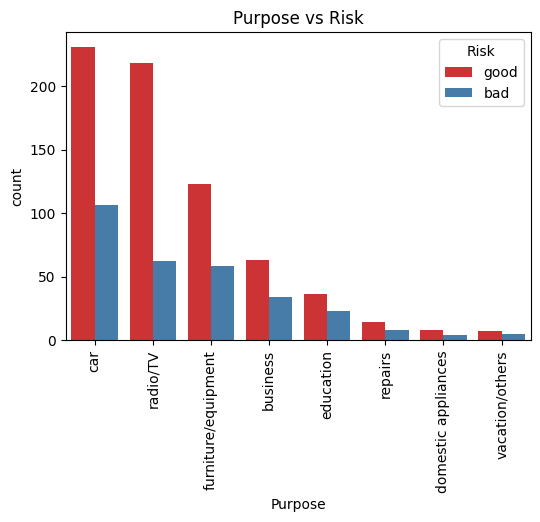

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Risk', order=df[col].value_counts().index, palette="Set1")
    plt.title(f'{col} vs Risk')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
# Create binary flags
df['Has_Saving'] = (df['Saving accounts'] != 'unknown').astype(int)
df['Has_Checking'] = (df['Checking account'] != 'unknown').astype(int)


In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Has_Saving,Has_Checking
0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,1
2,49,male,1,own,little,unknown,2096,12,education,good,1,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,1
4,53,male,2,free,little,little,4870,24,car,bad,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good,1,0
996,40,male,3,own,little,little,3857,30,car,good,1,1
997,38,male,2,own,little,unknown,804,12,radio/TV,good,1,0
998,23,male,2,free,little,little,1845,45,radio/TV,bad,1,1


In [ ]:
#checking the correlation between the features
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

corr_matrix



,Age,Job,Credit amount,Duration,Has_Saving,Has_Checking
Age,1.000000,0.015673,0.032716,-0.036136,-0.077811,-0.062436
Job,0.015673,1.000000,0.285385,0.210910,-0.029960,-0.052704
Credit amount,0.032716,0.285385,1.000000,0.624984,-0.106546,0.039485
Duration,-0.036136,0.210910,0.624984,1.000000,-0.071185,0.063467
Has_Saving,-0.077811,-0.029960,-0.106546,-0.071185,1.000000,0.142364
Has_Checking,-0.062436,-0.052704,0.039485,0.063467,0.142364,1.000000


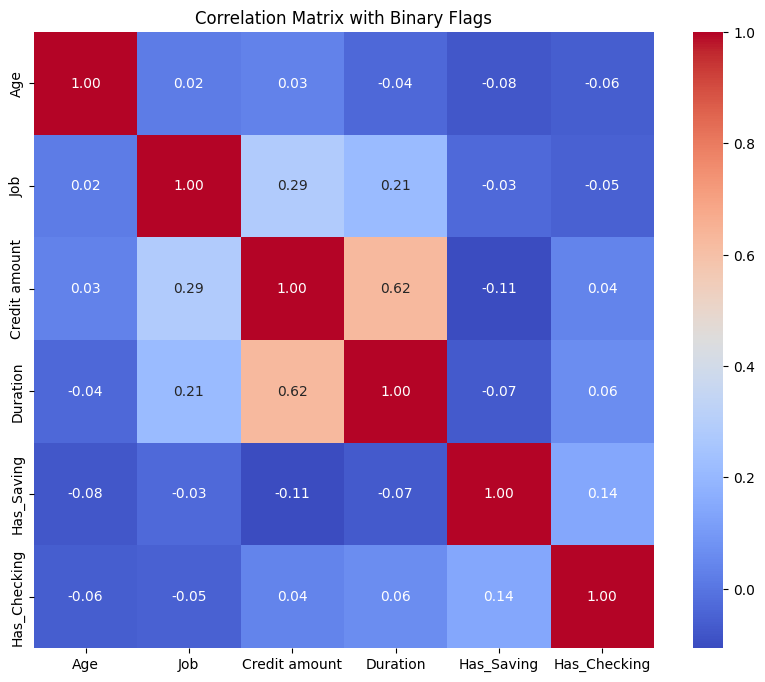

In [ ]:
# Display correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix with Binary Flags')
plt.show()

There is no strong correlation among the features. Tree based algorithms can handle the correlated features naturally.

In [ ]:
# Define threshold for rare categories
threshold = 25

# Get value counts of each category
value_counts = df['Purpose'].value_counts()

# Identify rare categories below threshold
rare_categories = value_counts[value_counts < threshold].index

# Replace rare categories with 'Other'
df['Purpose_grouped'] = df['Purpose'].replace(rare_categories, 'Other')

# Check the new distribution
print(df['Purpose_grouped'].value_counts())


Purpose_grouped
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
Other                   46
Name: count, dtype: int64


In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Has_Saving,Has_Checking,Purpose_grouped
0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0,1,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,1,radio/TV
2,49,male,1,own,little,unknown,2096,12,education,good,1,0,education
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,1,furniture/equipment
4,53,male,2,free,little,little,4870,24,car,bad,1,1,car


In [ ]:
df.drop(columns=['Purpose'], inplace=True)


In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Has_Saving,Has_Checking,Purpose_grouped
0,67,male,2,own,unknown,little,1169,6,good,0,1,radio/TV
1,22,female,2,own,little,moderate,5951,48,bad,1,1,radio/TV
2,49,male,1,own,little,unknown,2096,12,good,1,0,education
3,45,male,2,free,little,little,7882,42,good,1,1,furniture/equipment
4,53,male,2,free,little,little,4870,24,bad,1,1,car


In [ ]:
# Separate features and target
X = df.drop(columns=['Risk'])
y = df['Risk']

In [ ]:
X.shape

(1000, 11)

In [ ]:
y.shape

(1000,)

In [ ]:
# Label encode target variable
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

In [ ]:
y_encoded

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Columns to ordinal encode
ordinal_cols = ['Saving accounts', 'Checking account','Sex']

In [ ]:
# Columns for one-hot encoding
onehot_cols = ['Purpose_grouped', 'Housing']

In [ ]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('ord', OrdinalEncoder(), ordinal_cols),
    ('onehot', OneHotEncoder(drop='first'), onehot_cols)
])

In [ ]:
# Fit transformer on train data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ord', OrdinalEncoder(),
                                 ['Saving accounts', 'Checking account',
                                  'Sex']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Purpose_grouped', 'Housing'])])

In [ ]:
# Transform training and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
print("Train feature shape:", X_train_transformed.shape)
print("Test feature shape:", X_test_transformed.shape)

Train feature shape: (800, 10)
Test feature shape: (200, 10)


In [ ]:
X_train_transformed

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 2., 1., ..., 0., 0., 1.],
       [2., 3., 1., ..., 0., 0., 1.],
       ...,
       [3., 3., 1., ..., 0., 1., 0.],
       [4., 1., 1., ..., 1., 1., 0.],
       [0., 3., 0., ..., 1., 1., 0.]])

In [ ]:
X_test_transformed

array([[0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [4., 3., 1., ..., 0., 1., 0.]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# Define parameter grids
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [ ]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [2.0, 2.33], # (700/300, approximately)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree
dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=dt_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
dt_grid.fit(X_train_transformed, y_train)
dt_best = dt_grid.best_estimator_


In [ ]:
# Random Forest
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=rf_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
rf_grid.fit(X_train_transformed, y_train)
rf_best = rf_grid.best_estimator_

In [ ]:
# XGBoost
xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
xgb_grid.fit(X_train_transformed, y_train)
xgb_best = xgb_grid.best_estimator_

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:32:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("Best Decision Tree params:", dt_grid.best_params_)
print("Best Random Forest params:", rf_grid.best_params_)
print("Best XGBoost params:", xgb_grid.best_params_)

Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Random Forest params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
Best XGBoost params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 2.0, 'subsample': 0.8}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
dt_preds = dt_grid.predict(X_test_transformed)
rf_preds = rf_grid.predict(X_test_transformed)
xgb_preds = xgb_grid.predict(X_test_transformed)

In [ ]:
# Define a helper function to print metrics
def print_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} metrics:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}\n")

# Print metrics for each classifier
print_metrics("Decision Tree", y_test, dt_preds)
print_metrics("Random Forest", y_test, rf_preds)
print_metrics("XGBoost", y_test, xgb_preds)

Decision Tree metrics:
Accuracy: 0.6850, Precision: 0.8421, Recall: 0.6809, F1-score: 0.7529

Random Forest metrics:
Accuracy: 0.7000, Precision: 0.8716, Recall: 0.6738, F1-score: 0.7600

XGBoost metrics:
Accuracy: 0.7300, Precision: 0.7326, Recall: 0.9716, F1-score: 0.8354



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Print confusion matrix and classification report for each model
for name, preds in zip(['Decision Tree', 'Random Forest', 'XGBoost'], [dt_preds, rf_preds, xgb_preds]):
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print(f"{name} Classification Report:")
    print(classification_report(y_test, preds, target_names=['Good', 'Bad']))
    print("------------------------------------------------------\n")


Decision Tree Confusion Matrix:
[[41 18]
 [45 96]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

        Good       0.48      0.69      0.57        59
         Bad       0.84      0.68      0.75       141

    accuracy                           0.69       200
   macro avg       0.66      0.69      0.66       200
weighted avg       0.73      0.69      0.70       200

------------------------------------------------------

Random Forest Confusion Matrix:
[[45 14]
 [46 95]]
Random Forest Classification Report:
              precision    recall  f1-score   support

        Good       0.49      0.76      0.60        59
         Bad       0.87      0.67      0.76       141

    accuracy                           0.70       200
   macro avg       0.68      0.72      0.68       200
weighted avg       0.76      0.70      0.71       200

------------------------------------------------------

XGBoost Confusion Matrix:
[[  9  50]
 [  4 137]]
XGBoost C

**Confusion Matrix Highlights:**

Decision Tree: Balanced precision and recall for bad class with moderate false positives and false negatives.

Random Forest: Slightly better precision than Decision Tree but similar recall for bad class.

XGBoost: Highest recall for bad class (0.97), meaning it detects most risky customers, but lower precision (0.73) and many false positives (good customers labeled as bad).

**Interpretation and Recommendation:**

XGBoost is the best performing model overall, especially in identifying bad credit risk customers with very high recall, minimizing missed risky cases.

XGBoost’s higher false positive rate means more good customers might be flagged for further review, which could increase operational costs.

Depending on business tolerance, the trade-off between false negatives and false positives should be considered.

If minimizing financial risk due to missed bad customers is priority, XGBoost is recommended.

If reducing unnecessary reviews of good customers is preferred, Random Forest may be a reasonable alternative.

In [ ]:
import joblib


In [ ]:
# Save best model (e.g., XGBoost)
joblib.dump(xgb_best, 'best_model.pkl')

['best_model.pkl']

In [ ]:
# Save preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']